In [1]:
import bisect

import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
LOGROOT = "/home/mschoder/logs/waypoint_follow/parsed_logs/"

LOGFILE = "598a4fea-ef59-41dd-9257-0bf9c3d2a3e3_processed.pkl"
# LOGFILE = "3af6a9c3-8a79-46ac-b018-1e470ca50d77.processed.pkl"
# LOGFILE = "0f1d4d53-9ff7-4c38-b312-bb04e1f87f2d.processed.pkl"


In [3]:
file_path = LOGROOT + LOGFILE

with open(file_path, 'rb') as file:
    data = pickle.load(file)

print(data.keys())

dict_keys(['odometry_timestamp', 'position_ned', 'orientation_quat', 'linear_velocity', 'angular_velocity', 'gps_timestamp', 'position_lla', 'plan_timestamp', 'plan_trajectory', 'plan_trajectory_local_ned', 'autopilot_cmd_timestamp', 'autopilot_cmd_lla', 'autopilot_cmd_yaw', 'autopilot_cmd_local', 'local_origin_lla', 'pose_timestamps', 'pose_positions'])


In [4]:
print(len(data["position_ned"]))

13757


In [5]:
# times = data["odometry_timestamp"]
# positions = data["position_ned"]
# pos_n = [p[0] for p in positions]
# pos_e = [p[1] for p in positions]
# pos_d = [p[2] for p in positions]

# Positions in local frame
times = data["pose_timestamps"]
positions = data["pose_positions"]
pos_x = [p[0] for p in positions]
pos_y = [p[1] for p in positions]
pos_z = [p[2] for p in positions]

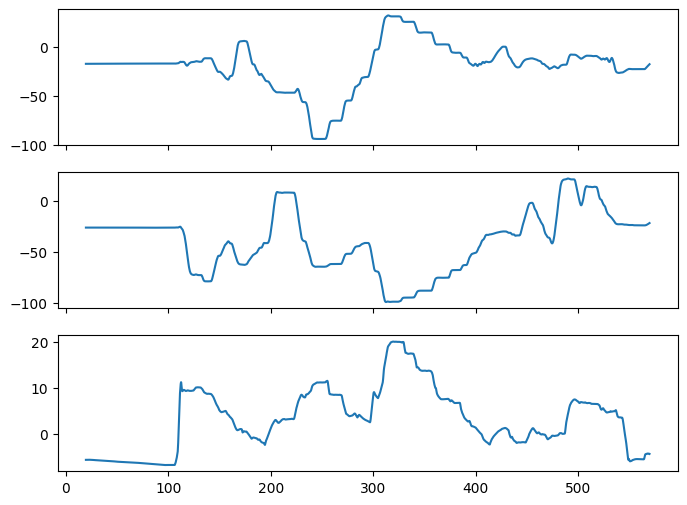

In [6]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
axs[0].plot(times, pos_x)
axs[1].plot(times, pos_y)
axs[2].plot(times, pos_z)

In [7]:
# Plans are in local frame
plan_times = data["plan_timestamp"]
plan_trajs = data["plan_trajectory"]
plan_traj_points = [[el[1:4] for el in traj] for traj in plan_trajs]

# TODO - need actual vehicle location to pre-pend at start of each plan, according to plan timestamp


In [8]:
command_times = data["autopilot_cmd_timestamp"]
command_positions = data["autopilot_cmd_local"]
cmd_x = [p[0] for p in command_positions]
cmd_y = [p[1] for p in command_positions]
cmd_z = [p[2] for p in command_positions]

print(command_positions[10])

# Filter to only commands which contain 

def get_n_commands_after_time(n, time):
    # Get idx of first element that's greater than `time`
    idx = bisect.bisect_right(command_times, time)
    return command_positions[idx:idx+n]

# TODO - need actual vehicle location to pre-pend at each command time 

# TODO - associate each command with a parent trajectory



# View data
# TODO - cannot use currently, no timestamps
# fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
# axs[0].plot(command_times, cmd_x)
# axs[1].plot(command_times, cmd_y)
# axs[2].plot(command_times, cmd_z)


[-30.79987448 -44.21797281   4.69787716]


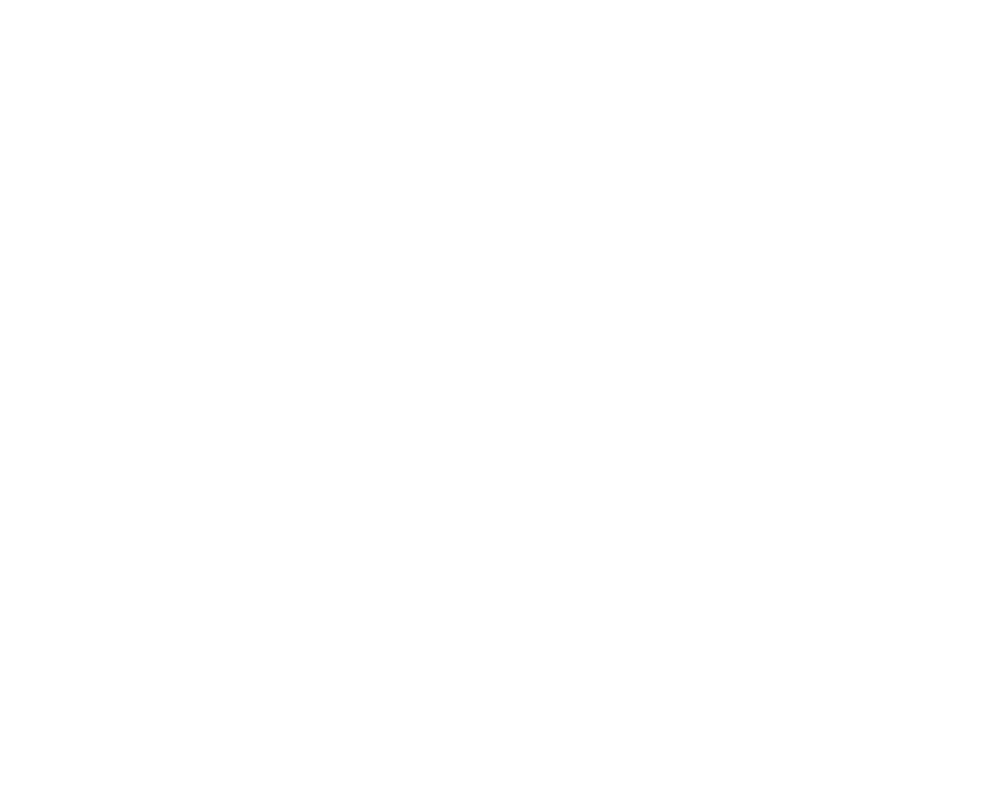

In [16]:
%matplotlib widget

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vehicle's actual trajectory
ax.plot(pos_x, pos_y, pos_z, color='b', linewidth=1.5, label='Trajectory')
ax.scatter(pos_x[0], pos_y[0], pos_z[0],
           color='g', s=80, label='Start')
ax.scatter(pos_x[0], pos_y[0], pos_z[0],
           color='k', s=80, label='End')

# Planned waypoint paths
for (id, plan) in enumerate(plan_traj_points[100:110parse_log:1]):
    pts = np.asarray(plan, dtype=float) # shape (3,3)
    x, y, z = pts.T
    ax.scatter(x, y, z, label=f"plan_{id}")
    ax.plot(x, y, z)

# Control commands - NOTE these are not timestamped, so we currently can't align with the parent trajectory or vehicle location
# cmd_pts = np.asarray(command_positions)
# x, y, z = cmd_pts.T
# ax.scatter(x, y, z)


ax.set_xlabel("North (X) [m]")
ax.set_ylabel("West (Y) [m]")
ax.set_zlabel("Altitude (Z) [m]")
ax.set_title("3D Trajectory (Scout Local (NWU) Frame)")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.ion() 
plt.show()